In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load csv
review_df = pd.read_csv("diabeticbloodteststrips_review_raw.csv")
review_df

,asin,url,score,sponsored,amazonChoice,bestSeller,amazonPrime,title,thumbnail,position.page,position.position,position.global_position,price.discounted,price.current_price,price.currency,price.before_price,price.savings_amount,price.savings_percent,reviews.total_reviews,reviews.rating
0,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,28358.4,False,False,False,False,Sponsored Ad - Accu-Chek Guide Test Strips for...,https://m.media-amazon.com/images/I/714JiizOqt...,1,2,1,False,24.99,USD,0.00,0.00,0.00,5908,4.8
1,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,33825.6,False,False,True,False,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",https://m.media-amazon.com/images/I/81aPkB4QWV...,1,5,2,True,23.99,USD,26.58,2.59,9.74,7047,4.8
2,B06XJG1KS9,https://www.amazon.com/dp/B06XJG1KS9,6825.7,False,False,False,True,6 x 50 ct TRUE METRIX® NFRS Test Strips (300 T...,https://m.media-amazon.com/images/I/71ehsIk4x2...,1,6,3,True,53.00,USD,60.00,7.00,11.67,1393,4.9
3,B06XHXXCVV,https://www.amazon.com/dp/B06XHXXCVV,10636.8,False,False,False,True,3 x 50ct TRUE METRIX® NFRS Test Strips (150 Te...,https://m.media-amazon.com/images/I/61dQiW53kj...,1,7,4,False,30.00,USD,0.00,0.00,0.00,2216,4.8
4,B00Y4KOBWK,https://www.amazon.com/dp/B00Y4KOBWK,6182.4,False,False,False,True,True Metrix Blood Glucose Test Strips Box of 50,https://m.media-amazon.com/images/I/6127qkwgav...,1,8,5,True,12.45,USD,18.29,5.84,31.93,1288,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,B09GZK133Z,https://www.amazon.com/dp/B09GZK133Z,53.9,False,False,False,True,"Pip Complete Kit | 1 Meter, 50 Test Strips, 50...",https://m.media-amazon.com/images/I/51FUIR3N7X...,1,53,52,False,0.00,USD,0.00,0.00,0.00,11,4.9
161,B09GKYPZ35,https://www.amazon.com/dp/B09GKYPZ35,5.0,False,False,False,True,Pip Blood Glucose Test Strips (50 Count),https://m.media-amazon.com/images/I/41d8L6kjpl...,1,54,53,False,0.00,USD,0.00,0.00,0.00,1,5.0
162,B07XYC6MX2,https://www.amazon.com/dp/B07XYC6MX2,64.4,False,False,False,False,Embrace Blood Glucose Pro Test Strips 50ct,https://m.media-amazon.com/images/I/41jlL1SAJN...,1,55,54,False,0.00,USD,0.00,0.00,0.00,14,4.6
163,B07K6KC8Z4,https://www.amazon.com/dp/B07K6KC8Z4,340.8,False,False,False,True,Oh’Care Lite Blood Sugar Testing Monitor – Glu...,https://m.media-amazon.com/images/I/71KdMiRtFb...,1,56,55,False,0.00,USD,0.00,0.00,0.00,71,4.8


In [3]:
df = review_df.drop_duplicates()
df = df.drop_duplicates(subset=['reviews.total_reviews'])
df = df[['title', 'bestSeller', 'amazonPrime', 'score','reviews.total_reviews', 'reviews.rating', 'asin', 'url']]
df = df.sort_values(by=['reviews.total_reviews'], ascending=False)
df["title"] = df["title"].str.replace("Sponsored Ad - ", "")
df[['brand1', 'brand2', 'spec']] = df['title'].str.split(' ', 2, expand=True)
df['brand'] = df[['brand1', 'brand2']].agg(' '.join, axis=1)
df = df.rename(columns={"reviews.total_reviews": "total_reviews", "reviews.rating": "rating"})

In [4]:
df

,title,bestSeller,amazonPrime,score,total_reviews,rating,asin,url,brand1,brand2,spec,brand
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ,TRUE,METRIX,Blood Glucose Test Strips NFRS 100ct (100 Test...,TRUE METRIX
11,Care Touch Blood Glucose Test Strips for Diabe...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F,Care,Touch,Blood Glucose Test Strips for Diabetes I For U...,Care Touch
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U,AZO,Urinary,"Tract Infection (UTI) Test Strips, Accurate Re...",AZO Urinary
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,CONTOUR,NEXT,"Blood Glucose Test Strips, 70 Count",CONTOUR NEXT
0,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek Guide
...,...,...,...,...,...,...,...,...,...,...,...,...
135,"ReliOn Prime Blood Glucose Test Strips, 100 Ct...",False,True,44.1,9,4.9,B08WRV47D9,https://www.amazon.com/dp/B08WRV47D9,ReliOn,Prime,"Blood Glucose Test Strips, 100 Ct + ""Look Afte...",ReliOn Prime
150,Advocate Redi-Code+ Test Strips Package - 10 B...,False,False,32.8,8,4.1,B08BFC2CQ9,https://www.amazon.com/dp/B08BFC2CQ9,Advocate,Redi-Code+,Test Strips Package - 10 Boxes (500ct) with No...,Advocate Redi-Code+
121,Diabetic Test Strips (6 Boxes 300 Count) 7308 ...,False,False,32.9,7,4.7,B09N9YBNN6,https://www.amazon.com/dp/B09N9YBNN6,Diabetic,Test,Strips (6 Boxes 300 Count) 7308 with Glucose T...,Diabetic Test
88,"Medline Evencare G2 Blood Glucose Test Strips,...",False,True,25.8,6,4.3,B00Q3YYUW6,https://www.amazon.com/dp/B00Q3YYUW6,Medline,Evencare,"G2 Blood Glucose Test Strips, For self-testing...",Medline Evencare


In [5]:
df["brand"] = df["brand"].str.replace("3 x", "TRUE METRIX®")
df["brand"] = df["brand"].str.replace("6 x", "TRUE METRIX®")

In [6]:
df.to_csv("diabeticbloodteststrips_review_clean_v1.csv", index=False, header=True)

In [7]:
filter_df = df.loc[(df['total_reviews'] >= 2000)]
filter_df

,title,bestSeller,amazonPrime,score,total_reviews,rating,asin,url,brand1,brand2,spec,brand
6,TRUE METRIX Blood Glucose Test Strips NFRS 100...,False,True,50635.2,10549,4.8,B085WBVJZZ,https://www.amazon.com/dp/B085WBVJZZ,TRUE,METRIX,Blood Glucose Test Strips NFRS 100ct (100 Test...,TRUE METRIX
11,Care Touch Blood Glucose Test Strips for Diabe...,False,True,45470.4,9473,4.8,B0794DFH6F,https://www.amazon.com/dp/B0794DFH6F,Care,Touch,Blood Glucose Test Strips for Diabetes I For U...,Care Touch
134,"AZO Urinary Tract Infection (UTI) Test Strips,...",False,True,41984.2,9127,4.6,B00854L57U,https://www.amazon.com/dp/B00854L57U,AZO,Urinary,"Tract Infection (UTI) Test Strips, Accurate Re...",AZO Urinary
1,"CONTOUR NEXT Blood Glucose Test Strips, 70 Count",True,False,33825.6,7047,4.8,B07CF8C4VX,https://www.amazon.com/dp/B07CF8C4VX,CONTOUR,NEXT,"Blood Glucose Test Strips, 70 Count",CONTOUR NEXT
0,Accu-Chek Guide Test Strips for Diabetic Blood...,False,False,28358.4,5908,4.8,B0727VTQGC,https://www.amazon.com/dp/B0727VTQGC,Accu-Chek,Guide,Test Strips for Diabetic Blood Glucose Testing...,Accu-Chek Guide
29,"TRUE METRIX Blood Glucose Test Strips, 50 Count",False,True,27576.0,5745,4.8,B013UCPRKC,https://www.amazon.com/dp/B013UCPRKC,TRUE,METRIX,"Blood Glucose Test Strips, 50 Count",TRUE METRIX
10,Freestyle lite glucose test strips 50 count,False,False,23424.8,4984,4.7,B075VD1JTW,https://www.amazon.com/dp/B075VD1JTW,Freestyle,lite,glucose test strips 50 count,Freestyle lite
31,Dario 100 Blood Glucose No Coding Needed Test ...,False,True,21756.3,4629,4.7,B07JPYMWYZ,https://www.amazon.com/dp/B07JPYMWYZ,Dario,100,Blood Glucose No Coding Needed Test Strips Car...,Dario 100
115,"ReliOn Prime Blood Glucose Test Strips, 100 Co...",False,False,19848.0,4135,4.8,B018F4BVDM,https://www.amazon.com/dp/B018F4BVDM,ReliOn,Prime,"Blood Glucose Test Strips, 100 Count, Single Pack",ReliOn Prime
5,OneTouch Verio Test Strips for Diabetes Value ...,False,True,15792.0,3290,4.8,B08L473F6W,https://www.amazon.com/dp/B08L473F6W,OneTouch,Verio,Test Strips for Diabetes Value Pack - 60 Count...,OneTouch Verio


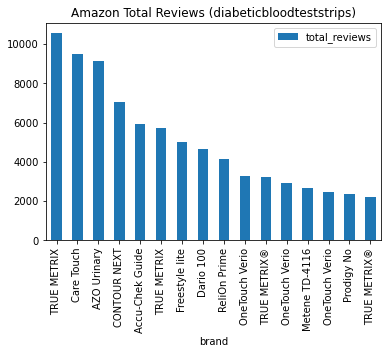

In [8]:
filter_df.plot.bar(x='brand', y=['total_reviews'], rot=90, title = 'Amazon Total Reviews (diabeticbloodteststrips)')
plt.savefig("diabeticbloodteststrips_review.png" , dpi = 2400, bbox_inches = "tight")